<a href="https://colab.research.google.com/github/Inga82/Classification/blob/main/predicting_stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install -q kaggle
!pip install -q kaggle-cli
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Kaggle Token/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json
# For competition datasets
#!kaggle competitions download -c dataset_name -p download_to_folder
# For other datasets
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset -p /content/drive/MyDrive/Kaggle

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 4.2MB 9.1MB/s 
     |████████████████████████████████| 112kB 38.1MB/s 
     |████████████████████████████████| 143kB 41.7MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-mn44hd3d/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-mn44hd3d/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-55iv1y1j/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.
{"username":"ingairle","key":"cced89a899ef934c4e3963c401a84002"}Downloading stroke-prediction-datase

In [10]:
!unzip /content/drive/MyDrive/Kaggle/Stroke.zip

Archive:  /content/drive/MyDrive/Kaggle/Stroke.zip
  inflating: healthcare-dataset-stroke-data.csv  


# Predicting stroke ¶

In [13]:
#Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Load dataset
#df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

## EDA

### Get to know the dataset

In [ ]:
#Get to know the dataset and display all columns
pd.set_option('display.max_columns', None)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Determine number of rows and columns
df.shape

(5110, 12)

In [ ]:
#Check features, datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Feature "bmi" contains 201 null values. This is only a few values and can therefore be dropped from the dataset.

### Remove null values from dataset

In [ ]:
#Remove rows with null values
df = df.dropna(how='any',axis=0) 

In [ ]:
#Determine number of rows and columns
df.shape

(4909, 12)

### Proportion of the different genders in the dataset

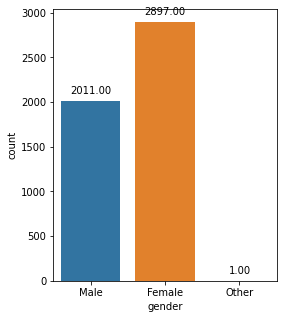

In [ ]:
plt.figure(figsize=(4,5))
countplot_gender = sns.countplot(data=df,x='gender')

for p in countplot_gender.patches:
    countplot_gender.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The are ~800 more females than males in dataset.

### Porportion of stroke patients in dataset

<AxesSubplot:xlabel='stroke', ylabel='count'>

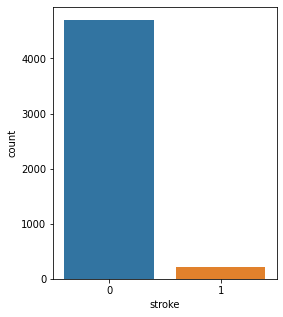

In [ ]:
plt.figure(figsize=(4,5))
sns.countplot(data=df,x='stroke')

The dataset is imbalanced dataset with only few stroke patients. This needs to be addressed during data preprocessing before building the predictive models.

### Gender of stroke patients

<AxesSubplot:xlabel='gender', ylabel='count'>

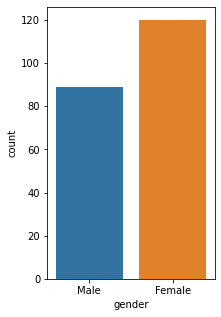

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==1]
sns.countplot(data=df_stroke,x='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

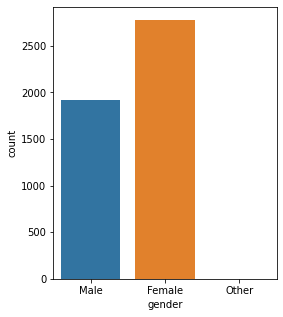

In [ ]:
plt.figure(figsize=(4,5))
df_stroke=df.loc[df['stroke']==0]
sns.countplot(data=df_stroke,x='gender')

## Hypertension in stroke patients

<AxesSubplot:xlabel='hypertension', ylabel='count'>

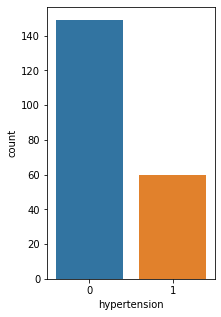

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==1]
sns.countplot(data=df_stroke,x='hypertension')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

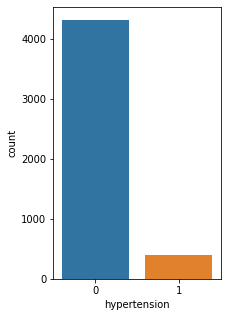

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==0]
sns.countplot(data=df_stroke,x='hypertension')

Hypertension more prevalent in stroke patients compared to non-stroke patients.

## Heart disease in stroke patients

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

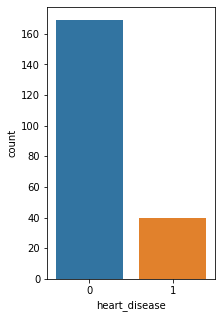

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==1]
sns.countplot(data=df_stroke,x='heart_disease')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

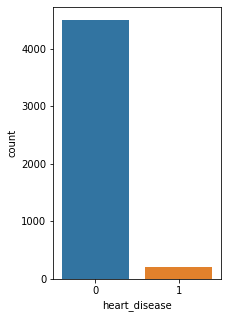

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==0]
sns.countplot(data=df_stroke,x='heart_disease')

Heart disease more prevalent in stroke patients compared to non-stroke patients.

## Marital status of stroke patients

<AxesSubplot:xlabel='ever_married', ylabel='count'>

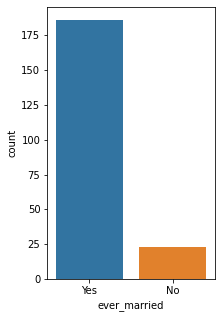

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==1]
sns.countplot(data=df_stroke,x='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

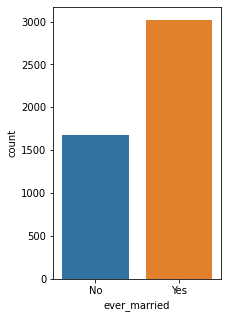

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==0]
sns.countplot(data=df_stroke,x='ever_married')

Stroke is more prevalent in patients ever married.

## Work type of stroke patients

<AxesSubplot:xlabel='work_type', ylabel='count'>

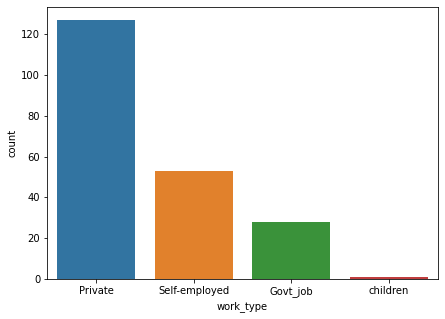

In [ ]:
plt.figure(figsize=(7,5))
df_stroke=df.loc[df['stroke']==1]
sns.countplot(data=df_stroke,x='work_type')

<AxesSubplot:xlabel='work_type', ylabel='count'>

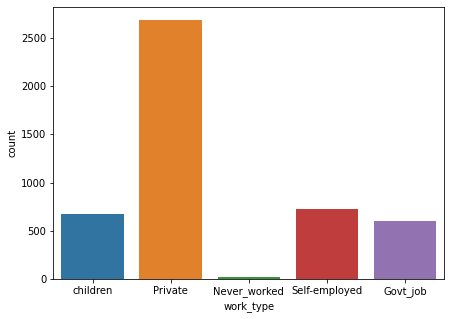

In [ ]:
plt.figure(figsize=(7,5))
df_stroke=df.loc[df['stroke']==0]
sns.countplot(data=df_stroke,x='work_type')

Difficult to draw conclusions due to small number of classes within stroke patients, class "children" seems to be less prevalent in stroke patients.

## Residence type of stroke patients

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

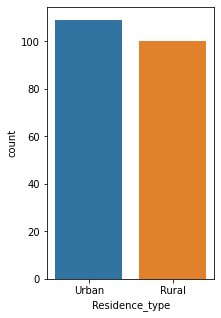

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==1]
sns.countplot(data=df_stroke,x='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

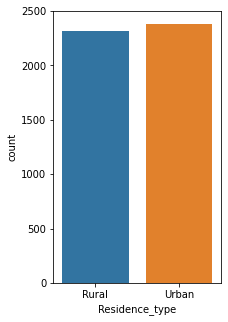

In [ ]:
plt.figure(figsize=(3,5))
df_stroke=df.loc[df['stroke']==0]
sns.countplot(data=df_stroke,x='Residence_type')

Resident type does not seem to be a relevant influental factor for stroke.

### Smoking status and stroke

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

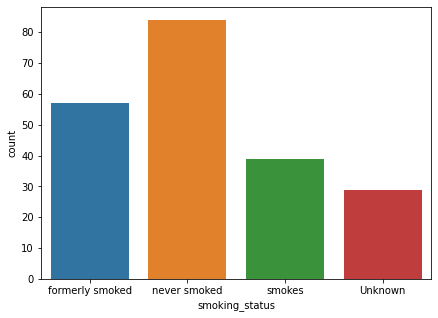

In [ ]:
plt.figure(figsize=(7,5))
df_stroke=df.loc[df['stroke']==1]
sns.countplot(data=df_stroke,x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

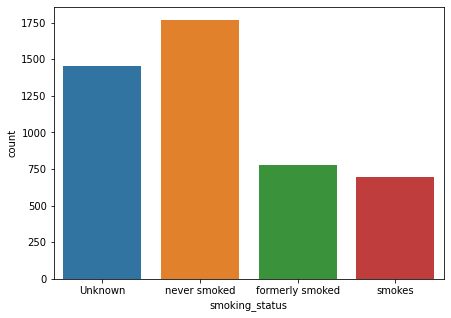

In [ ]:
plt.figure(figsize=(7,5))
df_stroke=df.loc[df['stroke']==0]
sns.countplot(data=df_stroke,x='smoking_status')

Difficult to draw conclusions due to large number of "Unknown".

### Age and stroke

<AxesSubplot:xlabel='age', ylabel='Density'>

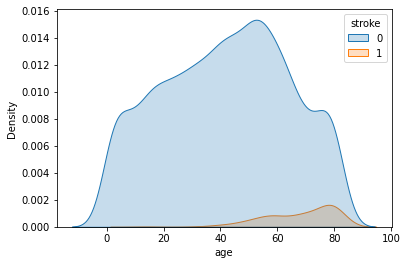

In [ ]:
sns.kdeplot(df['age'], data = df, hue = 'stroke', fill=True)

* dataset with good age distribution
* stroke is more frequent in older age

### BMI and stroke

<AxesSubplot:xlabel='bmi', ylabel='Density'>

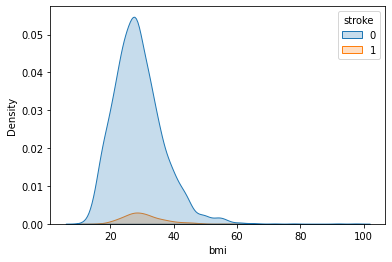

In [ ]:
sns.kdeplot(df['bmi'], data = df, hue = 'stroke', fill=True)

Stroke does not seem to correlate with bmi.

### Glucose level and stroke

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

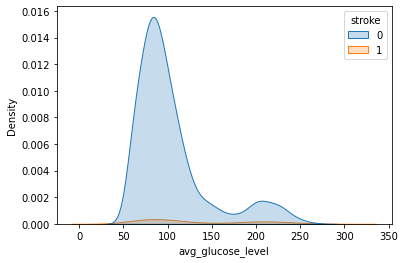

In [ ]:
sns.kdeplot(df['avg_glucose_level'], data = df, hue = 'stroke', fill=True)

Difficult to draw conclusions due to low number of stroke patients in dataset. 

<AxesSubplot:>

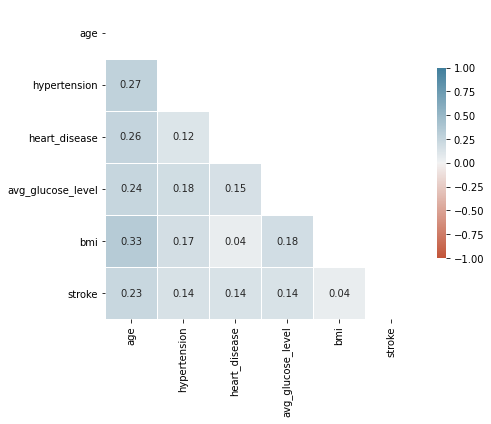

In [ ]:
df_corr = df.drop(columns=['id']).select_dtypes(include=np.number)

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin =-1, vmax=1, annot=True, fmt='.2f' ,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

* strongest correlation between age with bmi, hypertension, heart_disease, avg_glucose_level and stroke (descending order)
* stroke correlates weakly with hypertension, heart_disease and avg_glucose_level
* no correlation of stroke with bmi

## Data preprocessing

### Dropping feature 'id"

In [ ]:
#Drop "id" feature -> no predictive value
df.drop('id', axis='columns', inplace=True)

### Addressing imbalance within dataset of classes stroke / non-stroke

In [ ]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [ ]:
#Upsampling minority class: stroke = 1
df_majority = df[df['stroke']==0]
df_minority = df[df['stroke']==1]

df_minority_upsampled = resample(df_minority, replace = True, n_samples=4700, random_state=21)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['stroke'].value_counts()

0    4700
1    4700
Name: stroke, dtype: int64

### Deal with categorical data

In [ ]:
#One hot encoding
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [ ]:
df_upsampled = create_dummies(df_upsampled,"gender")
df_upsampled = create_dummies(df_upsampled,"ever_married")
df_upsampled = create_dummies(df_upsampled,"work_type")
df_upsampled = create_dummies(df_upsampled,"Residence_type")
df_upsampled = create_dummies(df_upsampled,"smoking_status")
df_upsampled.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0


In [ ]:
df_upsampled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0


## Comparing different models

In [ ]:
df_upsampled.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

### Define target variable

In [ ]:
columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']

X = df_upsampled[columns]
y = df_upsampled['stroke']


### Split dataset into trainingset and testset 

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,random_state=0)

### Feature scaling to account for models sensitivity to range of data  (not needed for Decision tree and random forest classifier)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(train_X)
X_test_scaled = sc.transform (test_X)

### Logistic regression¶

Fit the model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, train_y)
prediction_lr = lr.predict(X_test_scaled)

Get performance results of logistic regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, prediction_lr))
print(classification_report(test_y, prediction_lr))

[[1043  373]
 [ 245 1159]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1416
           1       0.76      0.83      0.79      1404

    accuracy                           0.78      2820
   macro avg       0.78      0.78      0.78      2820
weighted avg       0.78      0.78      0.78      2820



Trying to improve performance of logisitic regression using hyperparameter tuning

In [ ]:
import warnings
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'max_iter': list(range(100,800,100)), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lr_2 = LogisticRegression()
lr_2_model = RandomizedSearchCV(lr_2, param_grid_lr, cv = 5)
lr_2_model.fit(X_train_scaled, train_y)
prediction_lr_2 = lr_2_model.best_estimator_.predict(X_test_scaled)

print("Tuned Logistic Regression Parameters: {}".format(lr_2_model.best_params_)) 
print("Best score is {}".format(lr_2_model.best_score_))

print(confusion_matrix(test_y,prediction_lr_2))
print(classification_report(test_y,prediction_lr_2))



Tuned Logistic Regression Parameters: {'solver': 'sag', 'penalty': 'l2', 'max_iter': 100, 'C': 1}
Best score is 0.7794832826747721
[[1043  373]
 [ 245 1159]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1416
           1       0.76      0.83      0.79      1404

    accuracy                           0.78      2820
   macro avg       0.78      0.78      0.78      2820
weighted avg       0.78      0.78      0.78      2820



### Decision tree classifier (scaling not needed,  because model is not sensitive to the the variance in the data)

Fit the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

dtc = DecisionTreeClassifier()
dtc = dtc_1.fit(train_X, train_y)
prediction_dtc = dtc_1.predict(test_X)

Get performance results of the decision tree model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, prediction_dtc))
print(classification_report(test_y, prediction_dtc))

[[1345   71]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1416
           1       0.95      1.00      0.98      1404

    accuracy                           0.97      2820
   macro avg       0.98      0.97      0.97      2820
weighted avg       0.98      0.97      0.97      2820



Trying to improve performance of decision tree model using hyperparameter tuning

In [ ]:
import warnings
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_grid_dtc = {"max_depth": [3,None], "max_features":randint(1,5), "min_samples_leaf":randint(1,9), "criterion": ["gini", "entropy"]}
dtc_2 =DecisionTreeClassifier()
dtc_2_model = RandomizedSearchCV(dtc_2, param_grid_dtc, cv = 5)
dtc_2_model.fit(train_X, train_y)
prediction_dtc_2 = dtc_2_model.best_estimator_.predict(test_X)

print("Tuned Decision Tree Parameters: {}".format(dtc_2_model.best_params_)) 
print("Best score is {}".format(dtc_2_model.best_score_))

print(confusion_matrix(test_y, prediction_dtc_2))
print(classification_report(test_y,prediction_dtc_2))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.9732522796352583
[[1343   73]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1416
           1       0.95      1.00      0.97      1404

    accuracy                           0.97      2820
   macro avg       0.98      0.97      0.97      2820
weighted avg       0.98      0.97      0.97      2820



### Random Forest Classifier (no scaling needed)

Fit the model and get performance results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(train_X, train_y)
prediction_rfc=rfc.predict(test_X)

print(confusion_matrix(test_y, prediction_rfc))
print(classification_report(test_y, prediction_rfc))


[[1392   24]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1416
           1       0.98      1.00      0.99      1404

    accuracy                           0.99      2820
   macro avg       0.99      0.99      0.99      2820
weighted avg       0.99      0.99      0.99      2820



Trying to improve performance of the random forest model using hyperparameter tuning

In [ ]:
param_grid_rfc = {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [130, 180, 230]}
rfc_2 =RandomForestClassifier()
rfc_2_model = RandomizedSearchCV(rfc_2, param_grid_rfc, cv = 5)
rfc_2_model.fit(train_X, train_y)
prediction_rfc_2 = rfc_2_model.best_estimator_.predict(test_X)

print("Tuned RFC Parameters: {}".format(rfc_2_model.best_params_)) 
print("Best score is {}".format(rfc_2_model.best_score_))

print(confusion_matrix(test_y, prediction_rfc_2))
print(classification_report(test_y,prediction_rfc_2))

Tuned RFC Parameters: {'n_estimators': 230, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
Best score is 0.9919452887537993
[[1399   17]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1416
           1       0.99      1.00      0.99      1404

    accuracy                           0.99      2820
   macro avg       0.99      0.99      0.99      2820
weighted avg       0.99      0.99      0.99      2820



Evaluating feature importance in the random forest model by feature permutation: Feature permutation calculates the permutation importance by permuting the values for a single feature and making predictions using the resulting dataset. 

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc_2_model, random_state=0).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = test_X.columns.tolist(), top=5)

Age, avg_glucose_level and bmi are the most important features for the random forest model.

### Support vector machine 

Fit the model and get performance results

In [ ]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train_scaled, train_y)
prediction_svc = svc.predict(X_test_scaled)

print(confusion_matrix(test_y, prediction_svc))
print(classification_report(test_y,prediction_svc))

[[1098  318]
 [  87 1317]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.84      1416
           1       0.81      0.94      0.87      1404

    accuracy                           0.86      2820
   macro avg       0.87      0.86      0.86      2820
weighted avg       0.87      0.86      0.86      2820



In [ ]:
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

svc_2 = svm.SVC()
svc_2_model = RandomizedSearchCV(svc_2, param_grid_svc, cv = 5)
svc_2_model.fit(X_train_scaled, train_y)
prediction_svc_2 = svc_2_model.best_estimator_.predict(X_test_scaled)

print("Tuned RFC Parameters: {}".format(svc_2_model.best_params_)) 
print("Best score is {}".format(svc_2_model.best_score_))

print(confusion_matrix(test_y, prediction_svc_2))
print(classification_report(test_y,prediction_svc_2))

Tuned RFC Parameters: {'gamma': 1, 'C': 10}
Best score is 0.9685410334346505
[[1346   70]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1416
           1       0.95      1.00      0.98      1404

    accuracy                           0.98      2820
   macro avg       0.98      0.98      0.98      2820
weighted avg       0.98      0.98      0.98      2820



### K-nearest neighbor

Fit the model and get performance results

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, train_y)
prediction_knn = knn.predict(X_test_scaled)

print(confusion_matrix(test_y, prediction_knn))
print(classification_report(test_y,prediction_knn))

[[1219  197]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1416
           1       0.88      1.00      0.93      1404

    accuracy                           0.93      2820
   macro avg       0.94      0.93      0.93      2820
weighted avg       0.94      0.93      0.93      2820



Trying to improve performance of the knn model using hyperparameter tuning

In [ ]:
param_grid_knn = {'n_neighbors': [3,5,11, 13, 15, 17, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhatten']}
knn_2 = KNeighborsClassifier()
knn_2_model = RandomizedSearchCV(knn_2, param_grid_knn, cv = 5)
knn_2_model.fit(X_train_scaled, train_y)
prediction_knn = knn_2_model.best_estimator_.predict(X_test_scaled)

print("Tuned KNN Parameters: {}".format(knn_2_model.best_params_)) 
print("Best score is {}".format(knn_2_model.best_score_))

print(confusion_matrix(test_y, prediction_knn))
print(classification_report(test_y,prediction_knn))

Tuned KNN Parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}
Best score is 0.9430091185410335
[[1299  117]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1416
           1       0.92      1.00      0.96      1404

    accuracy                           0.96      2820
   macro avg       0.96      0.96      0.96      2820
weighted avg       0.96      0.96      0.96      2820



### Keras

Define the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
keras_model = Sequential()
keras_model.add(Dense(256, input_dim=21, activation='relu'))
keras_model.add(Dense(10, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

Compile the model

In [ ]:
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit the model

In [ ]:
keras_model.fit(X_train_scaled, train_y, epochs=150, batch_size=10)

Epoch 1/150
658/658 [==============================] - 1s 1ms/step - loss: 0.5135 - accuracy: 0.7512
Epoch 2/150
658/658 [==============================] - 1s 1ms/step - loss: 0.4007 - accuracy: 0.8168
Epoch 3/150
658/658 [==============================] - 1s 1ms/step - loss: 0.3642 - accuracy: 0.8354
Epoch 4/150
658/658 [==============================] - 1s 1ms/step - loss: 0.3458 - accuracy: 0.8477
Epoch 5/150
658/658 [==============================] - 1s 1ms/step - loss: 0.3120 - accuracy: 0.8734
Epoch 6/150
658/658 [==============================] - 1s 1ms/step - loss: 0.2928 - accuracy: 0.8795
Epoch 7/150
658/658 [==============================] - 1s 1ms/step - loss: 0.2612 - accuracy: 0.8924
Epoch 8/150
658/658 [==============================] - 1s 1ms/step - loss: 0.2515 - accuracy: 0.8946
Epoch 9/150
658/658 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9065
Epoch 10/150
658/658 [==============================] - 1s 1ms/step - loss: 0.2193 - accura

In [ ]:
predictions_keras = keras_model.predict(X_train_scaled)

In [ ]:
#??? Can't get metrics :-(
print(confusion_matrix(test_y, prediction_keras))
print(classification_report(test_y,prediction_keras))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Conclusions

The random forest classifier resulted in the most accurate predicition of stroke with highest recall and precision
* using hyperparameters 'n_estimators': 230, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False 
* with age, avg_glucose_level and bmi being the most important features.